In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense,Flatten ,Conv2D ,Reshape,LeakyReLU,Input,Activation,MaxPooling2D,UpSampling2D
from keras.models import Model

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
def show_digits(n,dims):
     #original images 
    plt.figure(figsize=(10,5))
    for i in range(n):
        ax=plt.subplot(2,n,i+1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()    # by default in bgr , convert it into grayscale
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i==n/2:
            ax.set_title("Original")
    #re-constructed images
        ax=plt.subplot(2,n,i+n+1)
        plt.imshow(reconstructed[i].reshape(*dims))
        plt.gray() 
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i==n/2:
            ax.set_title("Re-constructed")
    plt.show()

In [4]:
#lets add some noise 
noise=0.7
x_train_noisy = x_train + noise* np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise* np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

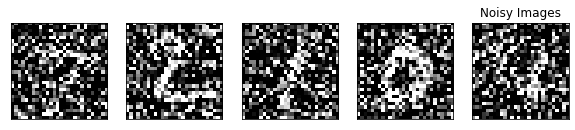

In [18]:
#visualize the noisy data
plt.figure(figsize=(10,5))
for i in range(5):
    ax= plt.subplot(1,5, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Images")
plt.show()

In [6]:
#model 
input_img=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  #opposite of maxpooling
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train_noisy, x_train,
epochs=25)

Epoch 1/25
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1533
Epoch 2/25
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1290
Epoch 3/25
60000/60000 [==============================] - 149s 2ms/step - loss: 0.1252
Epoch 4/25
60000/60000 [==============================] - 150s 3ms/step - loss: 0.1230
Epoch 5/25
60000/60000 [==============================] - 150s 2ms/step - loss: 0.1215
Epoch 6/25
60000/60000 [==============================] - 149s 2ms/step - loss: 0.1206
Epoch 7/25
60000/60000 [==============================] - 149s 2ms/step - loss: 0.1199
Epoch 8/25
60000/60000 [==============================] - 150s 2ms/step - loss: 0.1194
Epoch 9/25
60000/60000 [==============================] - 150s 2ms/step - loss: 0.1190
Epoch 10/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1187
Epoch 11/25
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1184
Epoch 12/25
60000/60000 [================

In [19]:
reconstructed = autoencoder.predict(x_test)

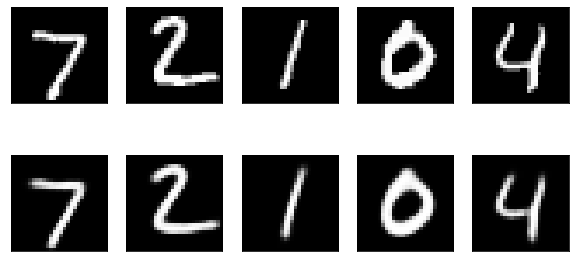

In [20]:
show_digits(5,(28,28))